### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

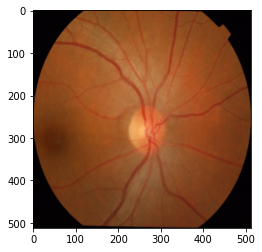

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
blue_channel_train = get_color_channel(2, img_train)
len(blue_channel_train)

50

### Test images

In [5]:
blue_channel_test = get_color_channel(2, img_test)
len(blue_channel_test)

51

#### Generator of augmented data:

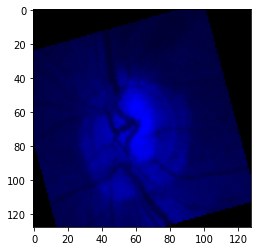

In [6]:
gen = data_generator(blue_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


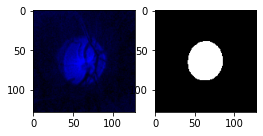

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(blue_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(blue_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_blue', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 45s 420ms/step - loss: 1.5596 - mean_IOU_gpu: 0.0689 - dice_metric: 0.1253 - val_loss: 1.4538 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 40s 407ms/step - loss: 1.5653 - mean_IOU_gpu: 0.0011 - dice_metric: 0.0021 - val_loss: 1.3953 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 41s 413ms/step - loss: 1.4369 - mean_IOU_gpu: 3.3057e-05 - dice_metric: 6.6007e-05 - val_loss: 1.3216 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 40s 407ms/step - loss: 1.2956 - mean_IOU_gpu: 0.0029 - dice_metric: 0.0056 - val_loss: 1.1806 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 41s 409ms/step - loss: 1.1939 - mean_IOU_gpu: 0.0623 - dice_metric: 0.1127 - val_loss: 1.0670 - val_mean_IO

99/99 [==============================] - 40s 404ms/step - loss: 0.2997 - mean_IOU_gpu: 0.5875 - dice_metric: 0.7185 - val_loss: 0.3702 - val_mean_IOU_gpu: 0.4913 - val_dice_metric: 0.6443
Epoch 42/500
99/99 [==============================] - 40s 404ms/step - loss: 0.2434 - mean_IOU_gpu: 0.6395 - dice_metric: 0.7653 - val_loss: 0.5109 - val_mean_IOU_gpu: 0.3911 - val_dice_metric: 0.5347
Epoch 43/500
99/99 [==============================] - 40s 406ms/step - loss: 0.2459 - mean_IOU_gpu: 0.6349 - dice_metric: 0.7595 - val_loss: 0.1881 - val_mean_IOU_gpu: 0.6634 - val_dice_metric: 0.7837
Epoch 44/500
99/99 [==============================] - 40s 401ms/step - loss: 0.2366 - mean_IOU_gpu: 0.6416 - dice_metric: 0.7674 - val_loss: 0.2091 - val_mean_IOU_gpu: 0.6430 - val_dice_metric: 0.7710
Epoch 45/500
99/99 [==============================] - 40s 401ms/step - loss: 0.3337 - mean_IOU_gpu: 0.5763 - dice_metric: 0.7038 - val_loss: 0.2129 - val_mean_IOU_gpu: 0.6303 - val_dice_metric: 0.7599
Epoch 46

Epoch 82/500
99/99 [==============================] - 39s 395ms/step - loss: 0.2215 - mean_IOU_gpu: 0.6513 - dice_metric: 0.7754 - val_loss: 0.4227 - val_mean_IOU_gpu: 0.4625 - val_dice_metric: 0.6091
Epoch 83/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1807 - mean_IOU_gpu: 0.6953 - dice_metric: 0.8095 - val_loss: 0.2414 - val_mean_IOU_gpu: 0.6113 - val_dice_metric: 0.7453
Epoch 84/500
99/99 [==============================] - 40s 407ms/step - loss: 0.2356 - mean_IOU_gpu: 0.6613 - dice_metric: 0.7759 - val_loss: 0.3169 - val_mean_IOU_gpu: 0.5350 - val_dice_metric: 0.6826
Epoch 85/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1810 - mean_IOU_gpu: 0.6833 - dice_metric: 0.8047 - val_loss: 0.2364 - val_mean_IOU_gpu: 0.6143 - val_dice_metric: 0.7488
Epoch 86/500
99/99 [==============================] - 40s 405ms/step - loss: 0.1724 - mean_IOU_gpu: 0.6968 - dice_metric: 0.8127 - val_loss: 0.1655 - val_mean_IOU_gpu: 0.6875 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1464 - mean_IOU_gpu: 0.7247 - dice_metric: 0.8334 - val_loss: 0.1746 - val_mean_IOU_gpu: 0.6803 - val_dice_metric: 0.7994
Epoch 124/500
99/99 [==============================] - 41s 410ms/step - loss: 0.1752 - mean_IOU_gpu: 0.7125 - dice_metric: 0.8204 - val_loss: 0.1789 - val_mean_IOU_gpu: 0.6743 - val_dice_metric: 0.7965
Epoch 125/500
99/99 [==============================] - 40s 402ms/step - loss: 0.1544 - mean_IOU_gpu: 0.7217 - dice_metric: 0.8310 - val_loss: 0.2064 - val_mean_IOU_gpu: 0.6440 - val_dice_metric: 0.7740
Epoch 126/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1440 - mean_IOU_gpu: 0.7357 - dice_metric: 0.8402 - val_loss: 0.1594 - val_mean_IOU_gpu: 0.6942 - val_dice_metric: 0.8087
Epoch 127/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1567 - mean_IOU_gpu: 0.7288 - dice_metric: 0.8331 - val_loss: 0.1790 - val_mean_IOU_gpu: 0.6734 - val_dice_metri

99/99 [==============================] - 40s 402ms/step - loss: 0.1282 - mean_IOU_gpu: 0.7565 - dice_metric: 0.8558 - val_loss: 0.1555 - val_mean_IOU_gpu: 0.7012 - val_dice_metric: 0.8148
Epoch 164/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1152 - mean_IOU_gpu: 0.7676 - dice_metric: 0.8653 - val_loss: 0.1644 - val_mean_IOU_gpu: 0.6893 - val_dice_metric: 0.8074
Epoch 165/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1508 - mean_IOU_gpu: 0.7377 - dice_metric: 0.8393 - val_loss: 0.1523 - val_mean_IOU_gpu: 0.7049 - val_dice_metric: 0.8172
Epoch 166/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1298 - mean_IOU_gpu: 0.7602 - dice_metric: 0.8574 - val_loss: 0.1614 - val_mean_IOU_gpu: 0.6934 - val_dice_metric: 0.8098
Epoch 167/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1399 - mean_IOU_gpu: 0.7344 - dice_metric: 0.8416 - val_loss: 0.1509 - val_mean_IOU_gpu: 0.7084 - val_dice_metric: 0.8181
Epoc

Epoch 204/500
99/99 [==============================] - 38s 388ms/step - loss: 0.1187 - mean_IOU_gpu: 0.7590 - dice_metric: 0.8602 - val_loss: 0.1419 - val_mean_IOU_gpu: 0.7225 - val_dice_metric: 0.8249
Epoch 205/500
99/99 [==============================] - 38s 385ms/step - loss: 0.1149 - mean_IOU_gpu: 0.7741 - dice_metric: 0.8678 - val_loss: 0.1446 - val_mean_IOU_gpu: 0.7188 - val_dice_metric: 0.8237
Epoch 206/500
99/99 [==============================] - 39s 399ms/step - loss: 0.1228 - mean_IOU_gpu: 0.7663 - dice_metric: 0.8618 - val_loss: 0.1423 - val_mean_IOU_gpu: 0.7180 - val_dice_metric: 0.8254
Epoch 207/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1197 - mean_IOU_gpu: 0.7606 - dice_metric: 0.8604 - val_loss: 0.1431 - val_mean_IOU_gpu: 0.7178 - val_dice_metric: 0.8237
Epoch 208/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1375 - mean_IOU_gpu: 0.7464 - dice_metric: 0.8481 - val_loss: 0.1462 - val_mean_IOU_gpu: 0.7142 - val_dice_metri

99/99 [==============================] - 40s 400ms/step - loss: 0.0989 - mean_IOU_gpu: 0.7899 - dice_metric: 0.8802 - val_loss: 0.1466 - val_mean_IOU_gpu: 0.7133 - val_dice_metric: 0.8218
Epoch 245/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1411 - mean_IOU_gpu: 0.7398 - dice_metric: 0.8431 - val_loss: 0.1463 - val_mean_IOU_gpu: 0.7139 - val_dice_metric: 0.8220
Epoch 246/500
99/99 [==============================] - 40s 401ms/step - loss: 0.1149 - mean_IOU_gpu: 0.7694 - dice_metric: 0.8659 - val_loss: 0.1510 - val_mean_IOU_gpu: 0.7092 - val_dice_metric: 0.8188
Epoch 247/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1248 - mean_IOU_gpu: 0.7638 - dice_metric: 0.8596 - val_loss: 0.1466 - val_mean_IOU_gpu: 0.7137 - val_dice_metric: 0.8219
Epoch 248/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1244 - mean_IOU_gpu: 0.7586 - dice_metric: 0.8577 - val_loss: 0.1457 - val_mean_IOU_gpu: 0.7158 - val_dice_metric: 0.8229
Epoc

Epoch 285/500
99/99 [==============================] - 38s 388ms/step - loss: 0.1177 - mean_IOU_gpu: 0.7722 - dice_metric: 0.8655 - val_loss: 0.1588 - val_mean_IOU_gpu: 0.6971 - val_dice_metric: 0.8115
Epoch 286/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1226 - mean_IOU_gpu: 0.7604 - dice_metric: 0.8589 - val_loss: 0.1485 - val_mean_IOU_gpu: 0.7147 - val_dice_metric: 0.8202
Epoch 287/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1120 - mean_IOU_gpu: 0.7731 - dice_metric: 0.8679 - val_loss: 0.1491 - val_mean_IOU_gpu: 0.7123 - val_dice_metric: 0.8206
Epoch 288/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1087 - mean_IOU_gpu: 0.7859 - dice_metric: 0.8751 - val_loss: 0.1444 - val_mean_IOU_gpu: 0.7213 - val_dice_metric: 0.8254
Epoch 289/500
99/99 [==============================] - 39s 397ms/step - loss: 0.1098 - mean_IOU_gpu: 0.7739 - dice_metric: 0.8691 - val_loss: 0.1469 - val_mean_IOU_gpu: 0.7183 - val_dice_metri

99/99 [==============================] - 39s 399ms/step - loss: 0.1129 - mean_IOU_gpu: 0.7739 - dice_metric: 0.8680 - val_loss: 0.1507 - val_mean_IOU_gpu: 0.7081 - val_dice_metric: 0.8194
Epoch 326/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1064 - mean_IOU_gpu: 0.7803 - dice_metric: 0.8735 - val_loss: 0.1464 - val_mean_IOU_gpu: 0.7167 - val_dice_metric: 0.8230
Epoch 327/500
99/99 [==============================] - 41s 410ms/step - loss: 0.1151 - mean_IOU_gpu: 0.7729 - dice_metric: 0.8669 - val_loss: 0.1405 - val_mean_IOU_gpu: 0.7234 - val_dice_metric: 0.8293
Epoch 328/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1087 - mean_IOU_gpu: 0.7795 - dice_metric: 0.8723 - val_loss: 0.1407 - val_mean_IOU_gpu: 0.7257 - val_dice_metric: 0.8295
Epoch 329/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1143 - mean_IOU_gpu: 0.7784 - dice_metric: 0.8699 - val_loss: 0.1476 - val_mean_IOU_gpu: 0.7128 - val_dice_metric: 0.8211
Epoc

Epoch 366/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1084 - mean_IOU_gpu: 0.7750 - dice_metric: 0.8703 - val_loss: 0.1369 - val_mean_IOU_gpu: 0.7244 - val_dice_metric: 0.8324
Epoch 367/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1049 - mean_IOU_gpu: 0.7827 - dice_metric: 0.8749 - val_loss: 0.1361 - val_mean_IOU_gpu: 0.7343 - val_dice_metric: 0.8342
Epoch 368/500
99/99 [==============================] - 38s 388ms/step - loss: 0.1029 - mean_IOU_gpu: 0.7876 - dice_metric: 0.8772 - val_loss: 0.1371 - val_mean_IOU_gpu: 0.7247 - val_dice_metric: 0.8317
Epoch 369/500
99/99 [==============================] - 38s 385ms/step - loss: 0.1147 - mean_IOU_gpu: 0.7656 - dice_metric: 0.8632 - val_loss: 0.1410 - val_mean_IOU_gpu: 0.7264 - val_dice_metric: 0.8295
Epoch 370/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0949 - mean_IOU_gpu: 0.7988 - dice_metric: 0.8858 - val_loss: 0.1475 - val_mean_IOU_gpu: 0.7207 - val_dice_metri

99/99 [==============================] - 40s 405ms/step - loss: 0.1131 - mean_IOU_gpu: 0.7750 - dice_metric: 0.8683 - val_loss: 0.1379 - val_mean_IOU_gpu: 0.7238 - val_dice_metric: 0.8316
Epoch 407/500
99/99 [==============================] - 40s 406ms/step - loss: 0.1011 - mean_IOU_gpu: 0.7900 - dice_metric: 0.8796 - val_loss: 0.1398 - val_mean_IOU_gpu: 0.7228 - val_dice_metric: 0.8293
Epoch 408/500
99/99 [==============================] - 40s 409ms/step - loss: 0.0932 - mean_IOU_gpu: 0.8085 - dice_metric: 0.8901 - val_loss: 0.1349 - val_mean_IOU_gpu: 0.7291 - val_dice_metric: 0.8349
Epoch 409/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1083 - mean_IOU_gpu: 0.7826 - dice_metric: 0.8736 - val_loss: 0.1384 - val_mean_IOU_gpu: 0.7306 - val_dice_metric: 0.8320
Epoch 410/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1112 - mean_IOU_gpu: 0.7850 - dice_metric: 0.8730 - val_loss: 0.1374 - val_mean_IOU_gpu: 0.7314 - val_dice_metric: 0.8330
Epoc

Epoch 447/500
99/99 [==============================] - 38s 388ms/step - loss: 0.0982 - mean_IOU_gpu: 0.7988 - dice_metric: 0.8840 - val_loss: 0.1371 - val_mean_IOU_gpu: 0.7280 - val_dice_metric: 0.8336
Epoch 448/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0956 - mean_IOU_gpu: 0.7950 - dice_metric: 0.8833 - val_loss: 0.1351 - val_mean_IOU_gpu: 0.7290 - val_dice_metric: 0.8347
Epoch 449/500
99/99 [==============================] - 38s 385ms/step - loss: 0.0906 - mean_IOU_gpu: 0.8089 - dice_metric: 0.8914 - val_loss: 0.1358 - val_mean_IOU_gpu: 0.7352 - val_dice_metric: 0.8360
Epoch 450/500
99/99 [==============================] - 39s 391ms/step - loss: 0.0958 - mean_IOU_gpu: 0.7971 - dice_metric: 0.8842 - val_loss: 0.1398 - val_mean_IOU_gpu: 0.7279 - val_dice_metric: 0.8313
Epoch 451/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1048 - mean_IOU_gpu: 0.7865 - dice_metric: 0.8757 - val_loss: 0.1422 - val_mean_IOU_gpu: 0.7184 - val_dice_metri

99/99 [==============================] - 39s 389ms/step - loss: 0.0903 - mean_IOU_gpu: 0.8039 - dice_metric: 0.8892 - val_loss: 0.1333 - val_mean_IOU_gpu: 0.7333 - val_dice_metric: 0.8368
Epoch 488/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0989 - mean_IOU_gpu: 0.7946 - dice_metric: 0.8817 - val_loss: 0.1349 - val_mean_IOU_gpu: 0.7322 - val_dice_metric: 0.8357
Epoch 489/500
99/99 [==============================] - 39s 391ms/step - loss: 0.0867 - mean_IOU_gpu: 0.8132 - dice_metric: 0.8949 - val_loss: 0.1298 - val_mean_IOU_gpu: 0.7397 - val_dice_metric: 0.8409
Epoch 490/500
99/99 [==============================] - 39s 398ms/step - loss: 0.0967 - mean_IOU_gpu: 0.7930 - dice_metric: 0.8810 - val_loss: 0.1342 - val_mean_IOU_gpu: 0.7372 - val_dice_metric: 0.8373
Epoch 491/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0910 - mean_IOU_gpu: 0.8061 - dice_metric: 0.8895 - val_loss: 0.1307 - val_mean_IOU_gpu: 0.7429 - val_dice_metric: 0.8412
Epoc

### Visual check

image #0


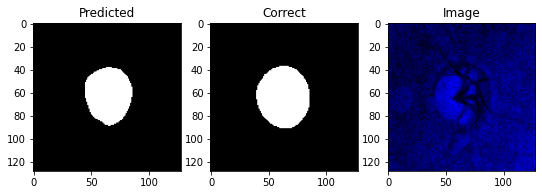

IOU: 0.8077709674835205
Dice: 0.8936651583710408
image #1


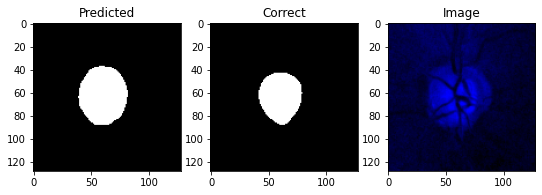

IOU: 0.7578263282775879
Dice: 0.8622311827956989
image #2


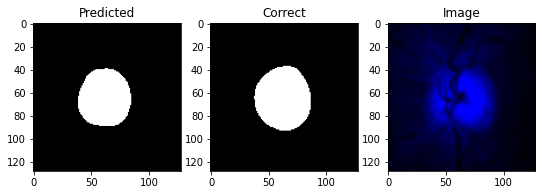

IOU: 0.8595426678657532
Dice: 0.9244667503136763
image #3


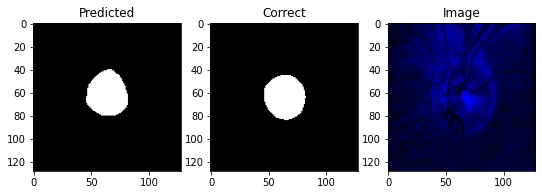

IOU: 0.8376787304878235
Dice: 0.9116704805491991
image #4


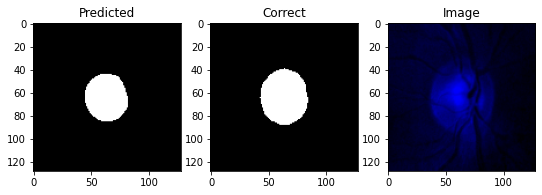

IOU: 0.7808483242988586
Dice: 0.8769397329483941
image #5


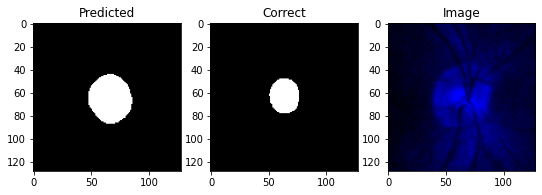

IOU: 0.5028203129768372
Dice: 0.6691689008042896
image #6


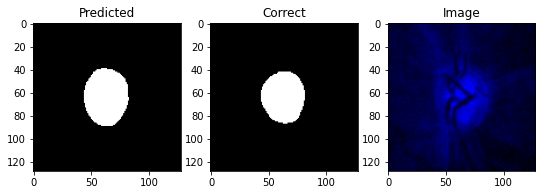

IOU: 0.8786089420318604
Dice: 0.9353824659448131
image #7


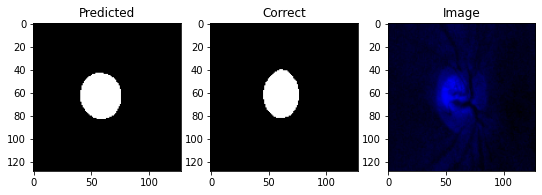

IOU: 0.7755444049835205
Dice: 0.8735849056603774
image #8


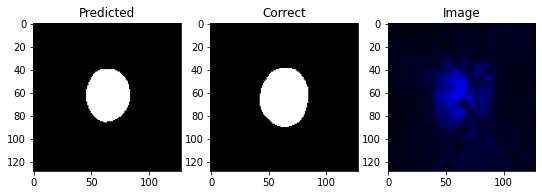

IOU: 0.8111764788627625
Dice: 0.8957453718739851
image #9


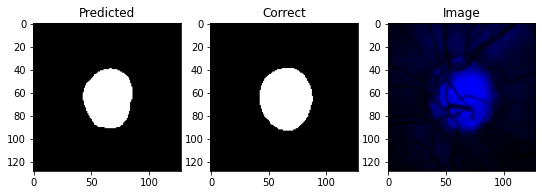

IOU: 0.8968008160591125
Dice: 0.9455930359085963
image #10


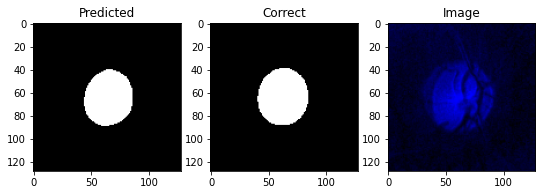

IOU: 0.8698092103004456
Dice: 0.9303721488595438
image #11


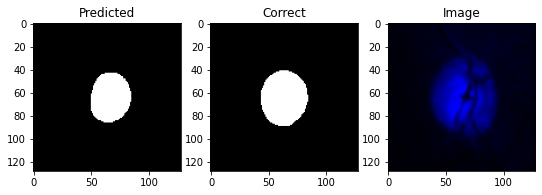

IOU: 0.7774903178215027
Dice: 0.8748180494905385
image #12


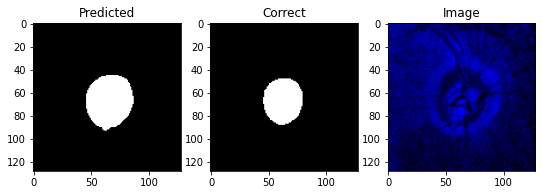

IOU: 0.720822274684906
Dice: 0.8377649325626204
image #13


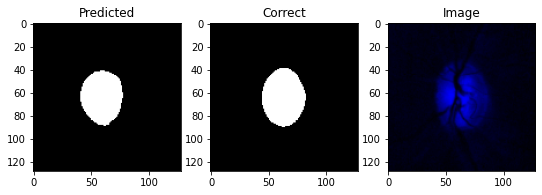

IOU: 0.7532792091369629
Dice: 0.8592803705023156
image #14


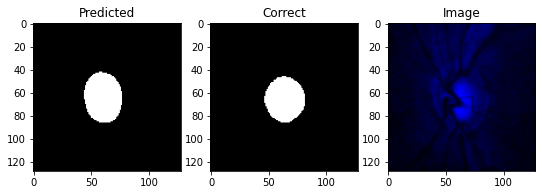

IOU: 0.7161639332771301
Dice: 0.8346101847679135
image #15


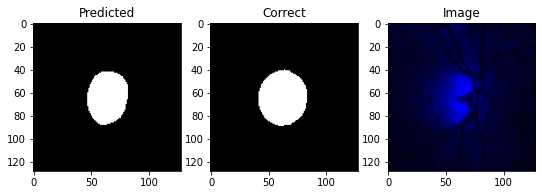

IOU: 0.8078848719596863
Dice: 0.8937348563516788
image #16


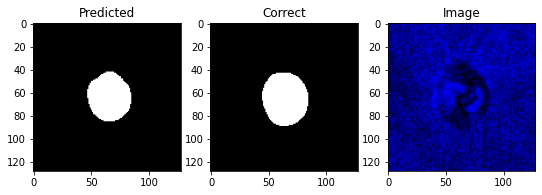

IOU: 0.840080976486206
Dice: 0.9130913091309131
image #17


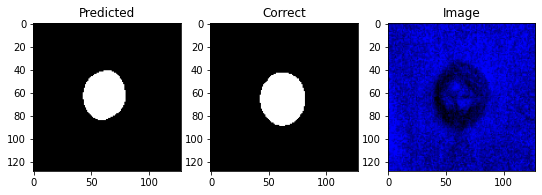

IOU: 0.8032786846160889
Dice: 0.8909090909090909
image #18


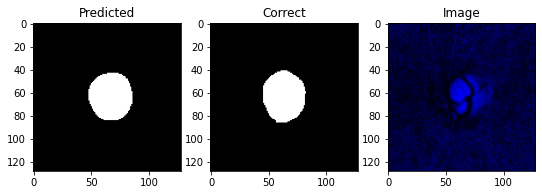

IOU: 0.7815771102905273
Dice: 0.8773991382687035
image #19


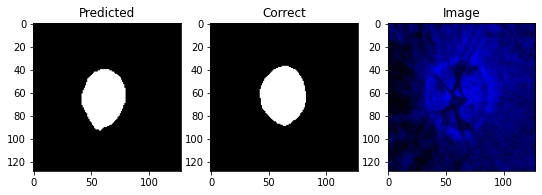

IOU: 0.8102932572364807
Dice: 0.895206611570248
image #20


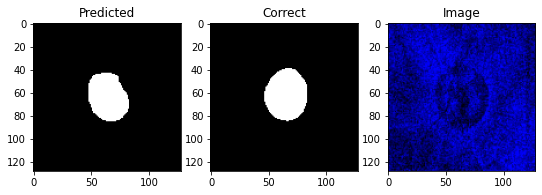

IOU: 0.8129127025604248
Dice: 0.8968029138000809
image #21


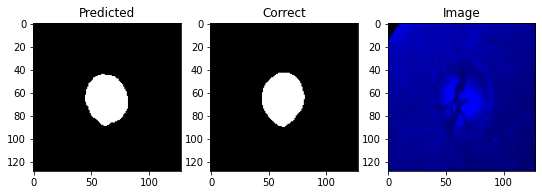

IOU: 0.9003773331642151
Dice: 0.9475774424146147
image #22


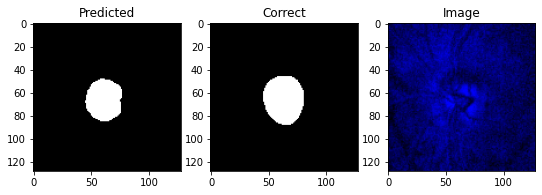

IOU: 0.7518734335899353
Dice: 0.8583650190114068
image #23


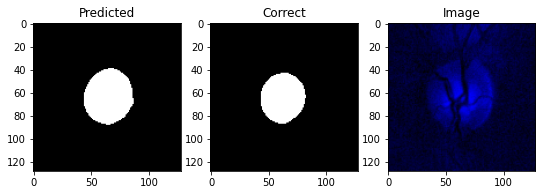

IOU: 0.8192020058631897
Dice: 0.9006168608636053
image #24


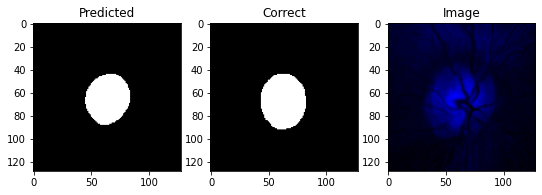

IOU: 0.8187702298164368
Dice: 0.900355871886121
image #25


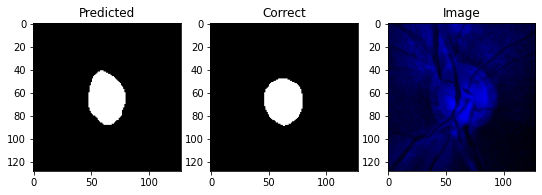

IOU: 0.8478444814682007
Dice: 0.9176578225068619
image #26


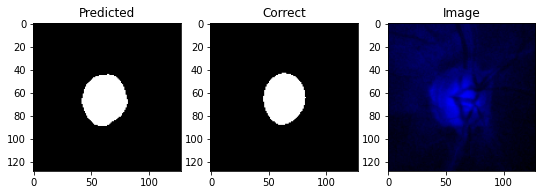

IOU: 0.8376068472862244
Dice: 0.9116279069767442
image #27


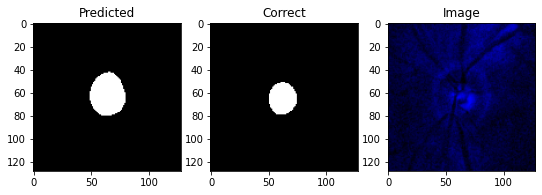

IOU: 0.5902547240257263
Dice: 0.7423398328690808
image #28


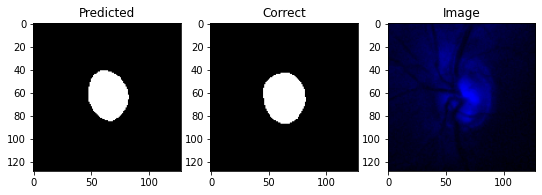

IOU: 0.8594470024108887
Dice: 0.9244114002478315
image #29


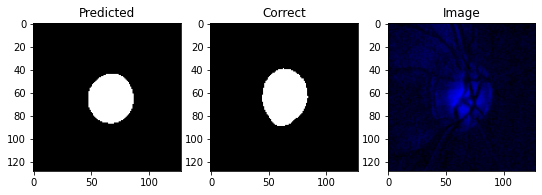

IOU: 0.7752525210380554
Dice: 0.8733997155049786
image #30


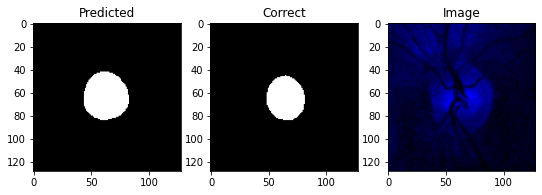

IOU: 0.7463712692260742
Dice: 0.8547681539807525
image #31


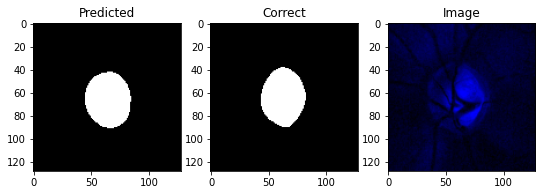

IOU: 0.8468578457832336
Dice: 0.9170796167822927
image #32


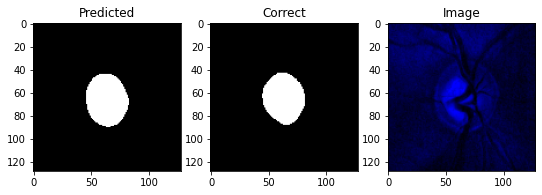

IOU: 0.9020771384239197
Dice: 0.9485179407176287
image #33


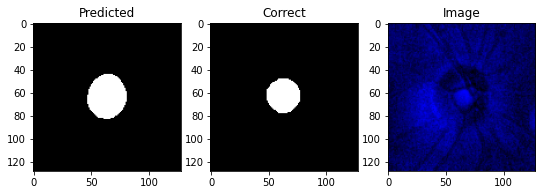

IOU: 0.6653696298599243
Dice: 0.7990654205607477
image #34


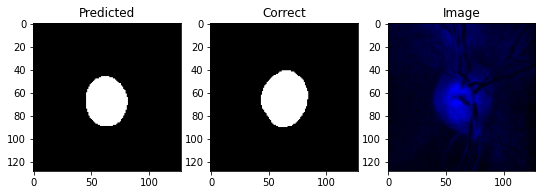

IOU: 0.803947389125824
Dice: 0.8913202042304887
image #35


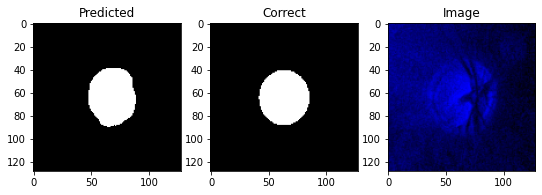

IOU: 0.7569593191146851
Dice: 0.8616697135892748
image #36


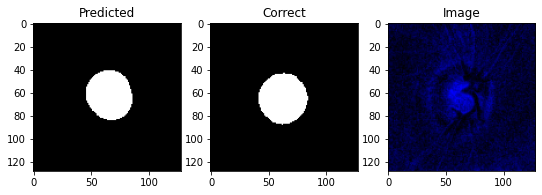

IOU: 0.7733585834503174
Dice: 0.8721965112139551
image #37


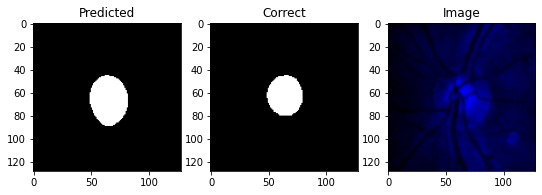

IOU: 0.7522202730178833
Dice: 0.858590978205778
image #38


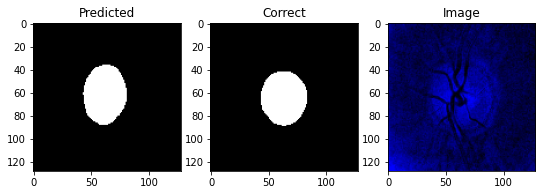

IOU: 0.8073449730873108
Dice: 0.893404397068621
image #39


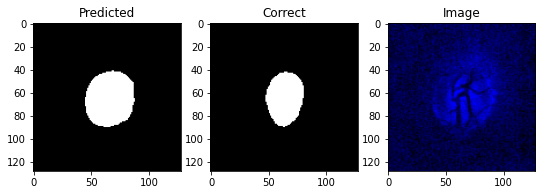

IOU: 0.7111111283302307
Dice: 0.8311688311688312
image #40


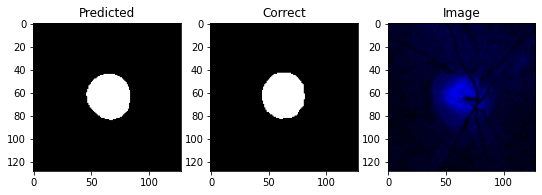

IOU: 0.8448818922042847
Dice: 0.9159197609901836
image #41


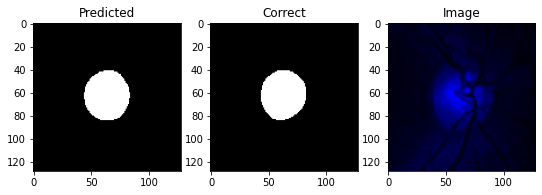

IOU: 0.9419448375701904
Dice: 0.9701046337817638
image #42


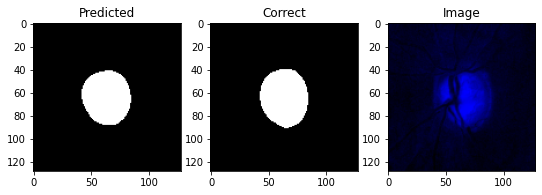

IOU: 0.9283175468444824
Dice: 0.9628264208909371
image #43


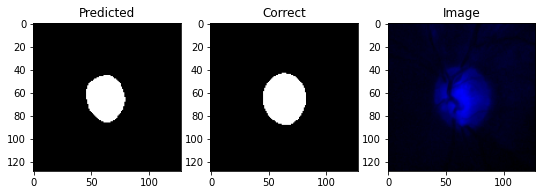

IOU: 0.8016909956932068
Dice: 0.8899317406143344
image #44


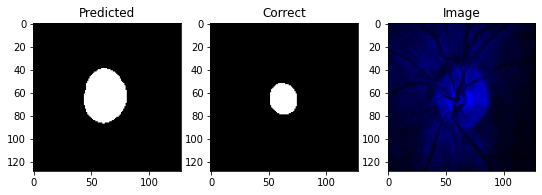

IOU: 0.37712177634239197
Dice: 0.5476956055734191
image #45


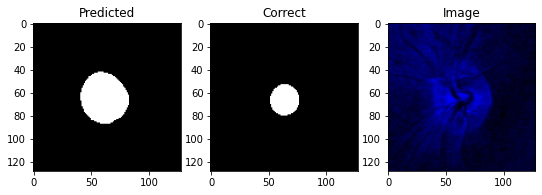

IOU: 0.37298810482025146
Dice: 0.5433231396534148
image #46


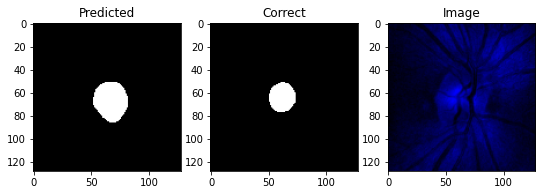

IOU: 0.5349397659301758
Dice: 0.6970172684458399
image #47


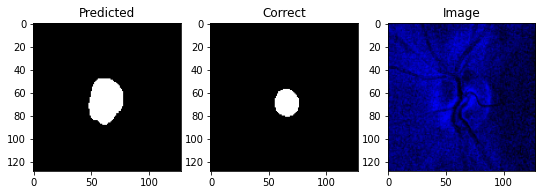

IOU: 0.4288816452026367
Dice: 0.6003039513677811
image #48


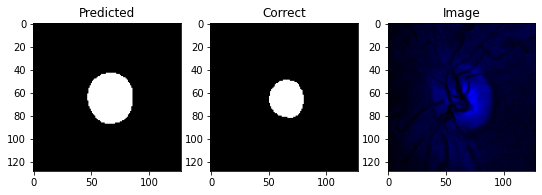

IOU: 0.5615941882133484
Dice: 0.7192575406032483
image #49


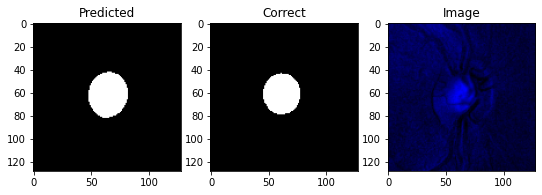

IOU: 0.7660343050956726
Dice: 0.8675191815856778
image #50


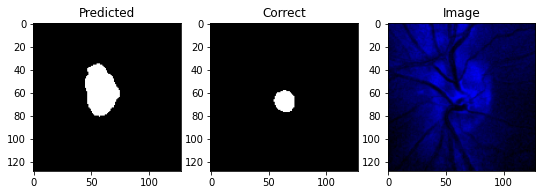

IOU: 0.2376137524843216
Dice: 0.3839869281045752


In [9]:
pred_iou, pred_dice, pred_cup = predict(blue_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.7522445
0.8489109294665591


### Training and Test disc

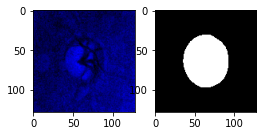

In [11]:
X_test, Z_test = next(data_generator(blue_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(blue_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_blue', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 41s 391ms/step - loss: 1.0181 - mean_IOU_gpu: 0.1827 - dice_metric: 0.3047 - val_loss: 0.9958 - val_mean_IOU_gpu: 0.3525 - val_dice_metric: 0.5022
Epoch 2/500
99/99 [==============================] - 36s 368ms/step - loss: 0.9622 - mean_IOU_gpu: 0.2619 - dice_metric: 0.4072 - val_loss: 0.9781 - val_mean_IOU_gpu: 0.3499 - val_dice_metric: 0.4976
Epoch 3/500
99/99 [==============================] - 31s 317ms/step - loss: 0.9856 - mean_IOU_gpu: 0.2996 - dice_metric: 0.4510 - val_loss: 0.9559 - val_mean_IOU_gpu: 0.3346 - val_dice_metric: 0.4818
Epoch 4/500
99/99 [==============================] - 38s 388ms/step - loss: 0.9619 - mean_IOU_gpu: 0.3537 - dice_metric: 0.5081 - val_loss: 0.9248 - val_mean_IOU_gpu: 0.3550 - val_dice_metric: 0.5027
Epoch 5/500
99/99 [==============================] - 38s 385ms/step - loss: 0.9112 - mean_IOU_gpu: 0.3759 - dice_metric: 0.5271 - val_loss: 0.8854 - val_mean_IOU_gpu: 0.3740 - val_dice_metric: 0.5213


99/99 [==============================] - 39s 392ms/step - loss: 0.1422 - mean_IOU_gpu: 0.7298 - dice_metric: 0.8398 - val_loss: 0.5904 - val_mean_IOU_gpu: 0.3406 - val_dice_metric: 0.4861
Epoch 42/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1380 - mean_IOU_gpu: 0.7359 - dice_metric: 0.8445 - val_loss: 0.5127 - val_mean_IOU_gpu: 0.3892 - val_dice_metric: 0.5409
Epoch 43/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1489 - mean_IOU_gpu: 0.7247 - dice_metric: 0.8349 - val_loss: 0.9109 - val_mean_IOU_gpu: 0.2163 - val_dice_metric: 0.3223
Epoch 44/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1491 - mean_IOU_gpu: 0.7225 - dice_metric: 0.8343 - val_loss: 0.9675 - val_mean_IOU_gpu: 0.2079 - val_dice_metric: 0.3133
Epoch 45/500
99/99 [==============================] - 39s 397ms/step - loss: 0.1240 - mean_IOU_gpu: 0.7558 - dice_metric: 0.8581 - val_loss: 0.5818 - val_mean_IOU_gpu: 0.3559 - val_dice_metric: 0.4931
Epoch 46

Epoch 82/500
99/99 [==============================] - 40s 409ms/step - loss: 0.0945 - mean_IOU_gpu: 0.8007 - dice_metric: 0.8872 - val_loss: 0.5517 - val_mean_IOU_gpu: 0.3765 - val_dice_metric: 0.5248
Epoch 83/500
99/99 [==============================] - 40s 401ms/step - loss: 0.1009 - mean_IOU_gpu: 0.7907 - dice_metric: 0.8811 - val_loss: 0.1158 - val_mean_IOU_gpu: 0.7643 - val_dice_metric: 0.8632
Epoch 84/500
99/99 [==============================] - 39s 398ms/step - loss: 0.0999 - mean_IOU_gpu: 0.7902 - dice_metric: 0.8808 - val_loss: 0.3740 - val_mean_IOU_gpu: 0.5025 - val_dice_metric: 0.6478
Epoch 85/500
99/99 [==============================] - 39s 400ms/step - loss: 0.0984 - mean_IOU_gpu: 0.7943 - dice_metric: 0.8832 - val_loss: 0.3187 - val_mean_IOU_gpu: 0.5458 - val_dice_metric: 0.6920
Epoch 86/500
99/99 [==============================] - 39s 399ms/step - loss: 0.0942 - mean_IOU_gpu: 0.8022 - dice_metric: 0.8880 - val_loss: 0.1792 - val_mean_IOU_gpu: 0.6805 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 41s 410ms/step - loss: 0.1084 - mean_IOU_gpu: 0.7799 - dice_metric: 0.8728 - val_loss: 0.1347 - val_mean_IOU_gpu: 0.7363 - val_dice_metric: 0.8436
Epoch 124/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0820 - mean_IOU_gpu: 0.8207 - dice_metric: 0.9000 - val_loss: 0.1858 - val_mean_IOU_gpu: 0.6768 - val_dice_metric: 0.7992
Epoch 125/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0900 - mean_IOU_gpu: 0.8084 - dice_metric: 0.8919 - val_loss: 0.1996 - val_mean_IOU_gpu: 0.6569 - val_dice_metric: 0.7849
Epoch 126/500
99/99 [==============================] - 39s 394ms/step - loss: 0.0784 - mean_IOU_gpu: 0.8277 - dice_metric: 0.9043 - val_loss: 0.1951 - val_mean_IOU_gpu: 0.6652 - val_dice_metric: 0.7908
Epoch 127/500
99/99 [==============================] - 39s 396ms/step - loss: 0.0837 - mean_IOU_gpu: 0.8192 - dice_metric: 0.8990 - val_loss: 0.1508 - val_mean_IOU_gpu: 0.7174 - val_dice_metri

99/99 [==============================] - 43s 430ms/step - loss: 0.0728 - mean_IOU_gpu: 0.8379 - dice_metric: 0.9105 - val_loss: 0.1536 - val_mean_IOU_gpu: 0.7183 - val_dice_metric: 0.8301
Epoch 164/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0816 - mean_IOU_gpu: 0.8218 - dice_metric: 0.9005 - val_loss: 0.1388 - val_mean_IOU_gpu: 0.7368 - val_dice_metric: 0.8435
Epoch 165/500
99/99 [==============================] - 43s 431ms/step - loss: 0.0829 - mean_IOU_gpu: 0.8196 - dice_metric: 0.8991 - val_loss: 0.0902 - val_mean_IOU_gpu: 0.8059 - val_dice_metric: 0.8906
Epoch 166/500
99/99 [==============================] - 44s 442ms/step - loss: 0.0847 - mean_IOU_gpu: 0.8164 - dice_metric: 0.8970 - val_loss: 0.1113 - val_mean_IOU_gpu: 0.7764 - val_dice_metric: 0.8707
Epoch 167/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0773 - mean_IOU_gpu: 0.8292 - dice_metric: 0.9053 - val_loss: 0.1861 - val_mean_IOU_gpu: 0.6784 - val_dice_metric: 0.8010
Epoc

Epoch 204/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0843 - mean_IOU_gpu: 0.8186 - dice_metric: 0.8979 - val_loss: 0.1053 - val_mean_IOU_gpu: 0.7859 - val_dice_metric: 0.8763
Epoch 205/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0754 - mean_IOU_gpu: 0.8322 - dice_metric: 0.9071 - val_loss: 0.1045 - val_mean_IOU_gpu: 0.7861 - val_dice_metric: 0.8771
Epoch 206/500
99/99 [==============================] - 42s 427ms/step - loss: 0.0731 - mean_IOU_gpu: 0.8358 - dice_metric: 0.9094 - val_loss: 0.0952 - val_mean_IOU_gpu: 0.7999 - val_dice_metric: 0.8863
Epoch 207/500
99/99 [==============================] - 43s 431ms/step - loss: 0.0718 - mean_IOU_gpu: 0.8387 - dice_metric: 0.9112 - val_loss: 0.0847 - val_mean_IOU_gpu: 0.8140 - val_dice_metric: 0.8953
Epoch 208/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0673 - mean_IOU_gpu: 0.8475 - dice_metric: 0.9163 - val_loss: 0.0739 - val_mean_IOU_gpu: 0.8328 - val_dice_metri

99/99 [==============================] - 42s 424ms/step - loss: 0.0734 - mean_IOU_gpu: 0.8337 - dice_metric: 0.9082 - val_loss: 0.0924 - val_mean_IOU_gpu: 0.8023 - val_dice_metric: 0.8875
Epoch 245/500
99/99 [==============================] - 43s 432ms/step - loss: 0.0667 - mean_IOU_gpu: 0.8485 - dice_metric: 0.9170 - val_loss: 0.0865 - val_mean_IOU_gpu: 0.8149 - val_dice_metric: 0.8953
Epoch 246/500
99/99 [==============================] - 41s 419ms/step - loss: 0.0625 - mean_IOU_gpu: 0.8566 - dice_metric: 0.9220 - val_loss: 0.0805 - val_mean_IOU_gpu: 0.8210 - val_dice_metric: 0.8998
Epoch 247/500
99/99 [==============================] - 42s 429ms/step - loss: 0.0692 - mean_IOU_gpu: 0.8433 - dice_metric: 0.9138 - val_loss: 0.0762 - val_mean_IOU_gpu: 0.8291 - val_dice_metric: 0.9049
Epoch 248/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0696 - mean_IOU_gpu: 0.8414 - dice_metric: 0.9129 - val_loss: 0.1028 - val_mean_IOU_gpu: 0.7919 - val_dice_metric: 0.8799
Epoc

Epoch 285/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0674 - mean_IOU_gpu: 0.8459 - dice_metric: 0.9156 - val_loss: 0.0802 - val_mean_IOU_gpu: 0.8220 - val_dice_metric: 0.9003
Epoch 286/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0633 - mean_IOU_gpu: 0.8532 - dice_metric: 0.9200 - val_loss: 0.0938 - val_mean_IOU_gpu: 0.8016 - val_dice_metric: 0.8867
Epoch 287/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0638 - mean_IOU_gpu: 0.8517 - dice_metric: 0.9192 - val_loss: 0.0942 - val_mean_IOU_gpu: 0.7995 - val_dice_metric: 0.8858
Epoch 288/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0698 - mean_IOU_gpu: 0.8422 - dice_metric: 0.9133 - val_loss: 0.0974 - val_mean_IOU_gpu: 0.7980 - val_dice_metric: 0.8841
Epoch 289/500
99/99 [==============================] - 42s 419ms/step - loss: 0.0642 - mean_IOU_gpu: 0.8515 - dice_metric: 0.9191 - val_loss: 0.0812 - val_mean_IOU_gpu: 0.8214 - val_dice_metri

99/99 [==============================] - 43s 431ms/step - loss: 0.0622 - mean_IOU_gpu: 0.8563 - dice_metric: 0.9218 - val_loss: 0.0827 - val_mean_IOU_gpu: 0.8154 - val_dice_metric: 0.8962
Epoch 326/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0608 - mean_IOU_gpu: 0.8580 - dice_metric: 0.9229 - val_loss: 0.0819 - val_mean_IOU_gpu: 0.8187 - val_dice_metric: 0.8982
Epoch 327/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0704 - mean_IOU_gpu: 0.8424 - dice_metric: 0.9130 - val_loss: 0.0762 - val_mean_IOU_gpu: 0.8282 - val_dice_metric: 0.9042
Epoch 328/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0603 - mean_IOU_gpu: 0.8593 - dice_metric: 0.9235 - val_loss: 0.0718 - val_mean_IOU_gpu: 0.8340 - val_dice_metric: 0.9080
Epoch 329/500
99/99 [==============================] - 42s 430ms/step - loss: 0.0605 - mean_IOU_gpu: 0.8581 - dice_metric: 0.9230 - val_loss: 0.0871 - val_mean_IOU_gpu: 0.8109 - val_dice_metric: 0.8932
Epoc

Epoch 366/500
99/99 [==============================] - 42s 419ms/step - loss: 0.0647 - mean_IOU_gpu: 0.8522 - dice_metric: 0.9193 - val_loss: 0.0806 - val_mean_IOU_gpu: 0.8179 - val_dice_metric: 0.8980
Epoch 367/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0599 - mean_IOU_gpu: 0.8604 - dice_metric: 0.9241 - val_loss: 0.0872 - val_mean_IOU_gpu: 0.8113 - val_dice_metric: 0.8934
Epoch 368/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0654 - mean_IOU_gpu: 0.8490 - dice_metric: 0.9172 - val_loss: 0.0789 - val_mean_IOU_gpu: 0.8229 - val_dice_metric: 0.9009
Epoch 369/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0624 - mean_IOU_gpu: 0.8572 - dice_metric: 0.9222 - val_loss: 0.0908 - val_mean_IOU_gpu: 0.8030 - val_dice_metric: 0.8884
Epoch 370/500
99/99 [==============================] - 42s 428ms/step - loss: 0.0602 - mean_IOU_gpu: 0.8598 - dice_metric: 0.9238 - val_loss: 0.0855 - val_mean_IOU_gpu: 0.8121 - val_dice_metri

99/99 [==============================] - 42s 426ms/step - loss: 0.0610 - mean_IOU_gpu: 0.8575 - dice_metric: 0.9225 - val_loss: 0.0807 - val_mean_IOU_gpu: 0.8207 - val_dice_metric: 0.8995
Epoch 407/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0589 - mean_IOU_gpu: 0.8622 - dice_metric: 0.9253 - val_loss: 0.0876 - val_mean_IOU_gpu: 0.8075 - val_dice_metric: 0.8913
Epoch 408/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0614 - mean_IOU_gpu: 0.8563 - dice_metric: 0.9218 - val_loss: 0.0783 - val_mean_IOU_gpu: 0.8240 - val_dice_metric: 0.9016
Epoch 409/500
99/99 [==============================] - 42s 428ms/step - loss: 0.0586 - mean_IOU_gpu: 0.8621 - dice_metric: 0.9251 - val_loss: 0.0789 - val_mean_IOU_gpu: 0.8230 - val_dice_metric: 0.9010
Epoch 410/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0612 - mean_IOU_gpu: 0.8595 - dice_metric: 0.9234 - val_loss: 0.0803 - val_mean_IOU_gpu: 0.8202 - val_dice_metric: 0.8993
Epoc

Epoch 447/500
99/99 [==============================] - 43s 435ms/step - loss: 0.0599 - mean_IOU_gpu: 0.8607 - dice_metric: 0.9244 - val_loss: 0.0838 - val_mean_IOU_gpu: 0.8144 - val_dice_metric: 0.8957
Epoch 448/500
99/99 [==============================] - 43s 431ms/step - loss: 0.0648 - mean_IOU_gpu: 0.8514 - dice_metric: 0.9186 - val_loss: 0.0972 - val_mean_IOU_gpu: 0.7904 - val_dice_metric: 0.8807
Epoch 449/500
99/99 [==============================] - 43s 433ms/step - loss: 0.0601 - mean_IOU_gpu: 0.8595 - dice_metric: 0.9237 - val_loss: 0.0759 - val_mean_IOU_gpu: 0.8270 - val_dice_metric: 0.9036
Epoch 450/500
99/99 [==============================] - 43s 431ms/step - loss: 0.0578 - mean_IOU_gpu: 0.8639 - dice_metric: 0.9262 - val_loss: 0.0846 - val_mean_IOU_gpu: 0.8132 - val_dice_metric: 0.8946
Epoch 451/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0570 - mean_IOU_gpu: 0.8666 - dice_metric: 0.9278 - val_loss: 0.0788 - val_mean_IOU_gpu: 0.8222 - val_dice_metri

99/99 [==============================] - 42s 426ms/step - loss: 0.0577 - mean_IOU_gpu: 0.8637 - dice_metric: 0.9263 - val_loss: 0.1013 - val_mean_IOU_gpu: 0.7860 - val_dice_metric: 0.8778
Epoch 488/500
99/99 [==============================] - 43s 432ms/step - loss: 0.0525 - mean_IOU_gpu: 0.8755 - dice_metric: 0.9331 - val_loss: 0.1069 - val_mean_IOU_gpu: 0.7771 - val_dice_metric: 0.8720
Epoch 489/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0588 - mean_IOU_gpu: 0.8617 - dice_metric: 0.9251 - val_loss: 0.0960 - val_mean_IOU_gpu: 0.7948 - val_dice_metric: 0.8835
Epoch 490/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0604 - mean_IOU_gpu: 0.8592 - dice_metric: 0.9233 - val_loss: 0.1013 - val_mean_IOU_gpu: 0.7859 - val_dice_metric: 0.8778
Epoch 491/500
99/99 [==============================] - 42s 423ms/step - loss: 0.0549 - mean_IOU_gpu: 0.8713 - dice_metric: 0.9305 - val_loss: 0.0982 - val_mean_IOU_gpu: 0.7912 - val_dice_metric: 0.8812
Epoc

image #0


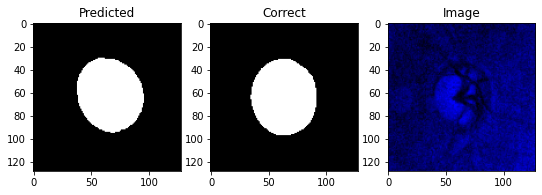

IOU: 0.8629134893417358
Dice: 0.9264128393375448
image #1


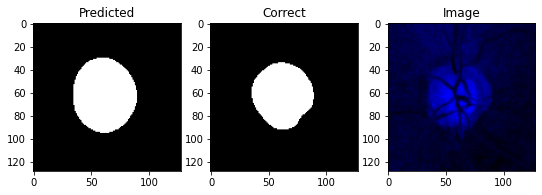

IOU: 0.8277460932731628
Dice: 0.9057560975609756
image #2


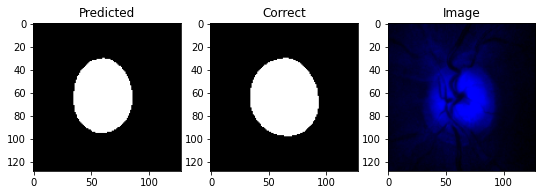

IOU: 0.8075471520423889
Dice: 0.8935281837160751
image #3


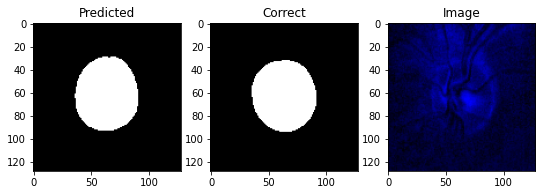

IOU: 0.927209734916687
Dice: 0.9622302158273381
image #4


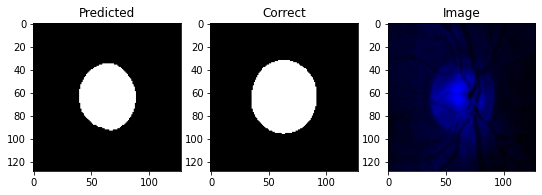

IOU: 0.7702322602272034
Dice: 0.8702047306698469
image #5


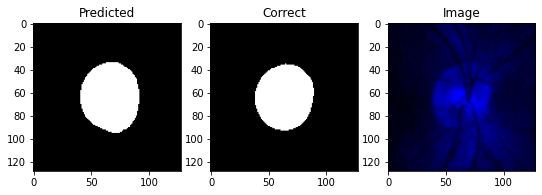

IOU: 0.8580392003059387
Dice: 0.9235964542000844
image #6


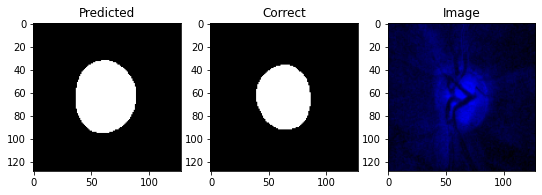

IOU: 0.7959572672843933
Dice: 0.8863877681036313
image #7


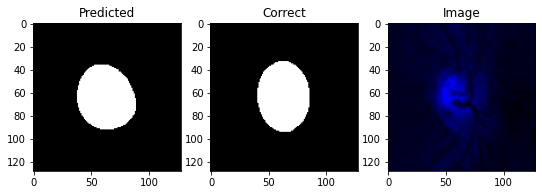

IOU: 0.8608658909797668
Dice: 0.9252315337700474
image #8


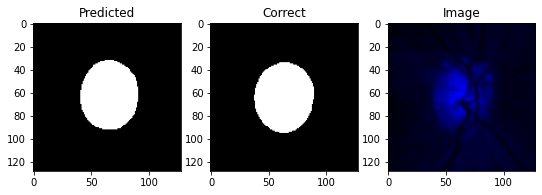

IOU: 0.8778507709503174
Dice: 0.9349526554137505
image #9


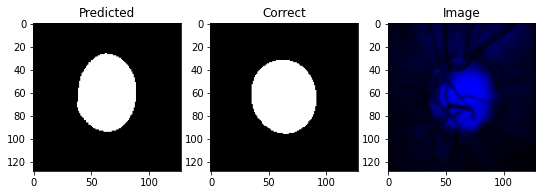

IOU: 0.845872163772583
Dice: 0.9165013525698827
image #10


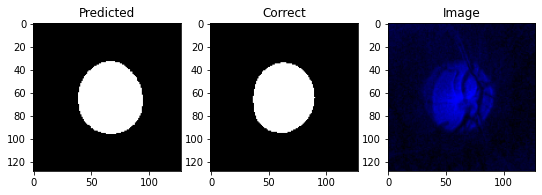

IOU: 0.8386874198913574
Dice: 0.9122675183167387
image #11


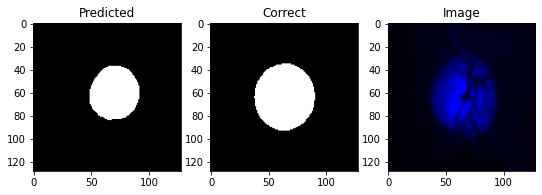

IOU: 0.6285949349403381
Dice: 0.7719475277497477
image #12


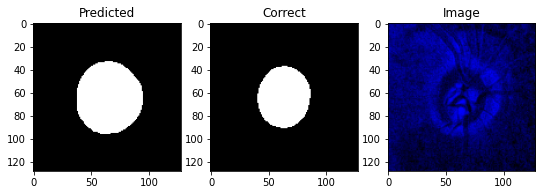

IOU: 0.6749824285507202
Dice: 0.8059576253408852
image #13


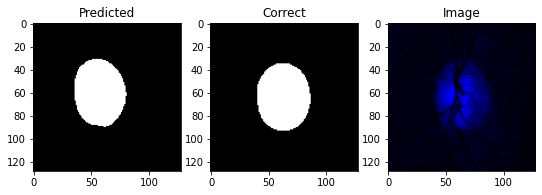

IOU: 0.6871263384819031
Dice: 0.8145523269548783
image #14


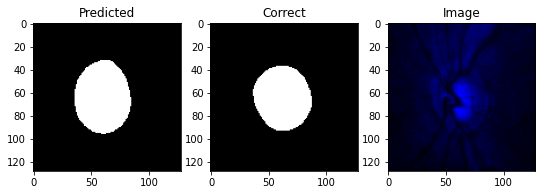

IOU: 0.8263095617294312
Dice: 0.9048954065128316
image #15


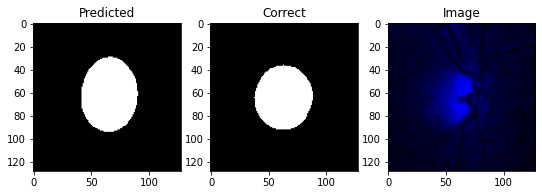

IOU: 0.8142968416213989
Dice: 0.897644539614561
image #16


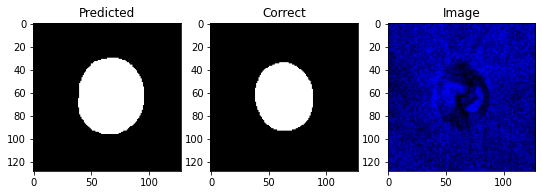

IOU: 0.7719528079032898
Dice: 0.871301775147929
image #17


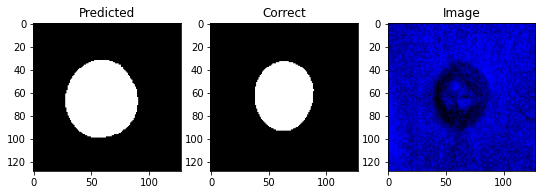

IOU: 0.7044437527656555
Dice: 0.826596675415573
image #18


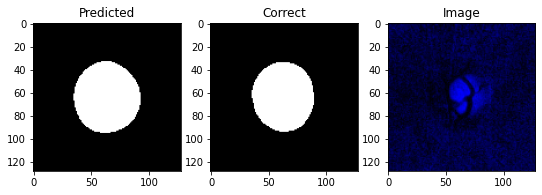

IOU: 0.9112701416015625
Dice: 0.953575439910146
image #19


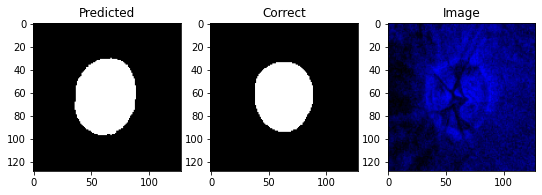

IOU: 0.8646055459976196
Dice: 0.9273870783304745
image #20


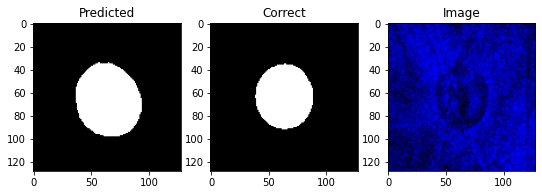

IOU: 0.7678321599960327
Dice: 0.8686708860759493
image #21


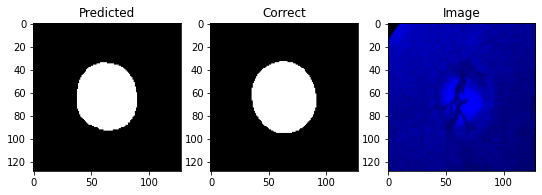

IOU: 0.903839111328125
Dice: 0.9494910697138468
image #22


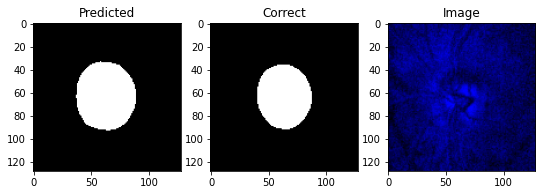

IOU: 0.8507341146469116
Dice: 0.9193477302776554
image #23


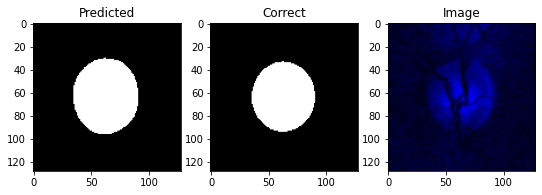

IOU: 0.8840382099151611
Dice: 0.9384503982621288
image #24


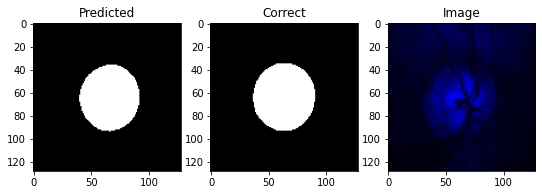

IOU: 0.8902007341384888
Dice: 0.9419113054341037
image #25


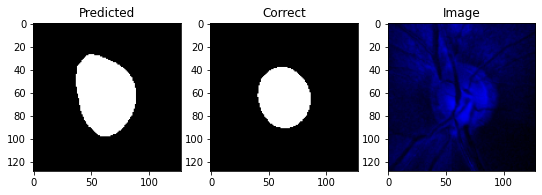

IOU: 0.6743184924125671
Dice: 0.805484147386461
image #26


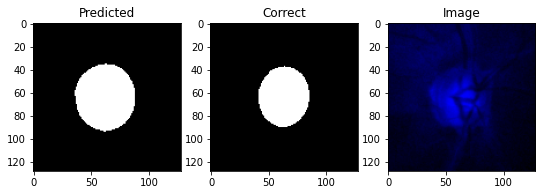

IOU: 0.7637362480163574
Dice: 0.8660436137071651
image #27


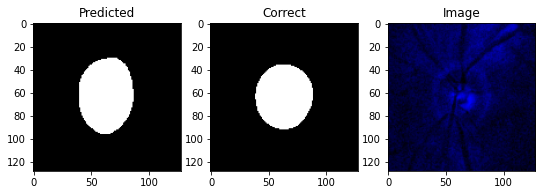

IOU: 0.8438485860824585
Dice: 0.9153122326775022
image #28


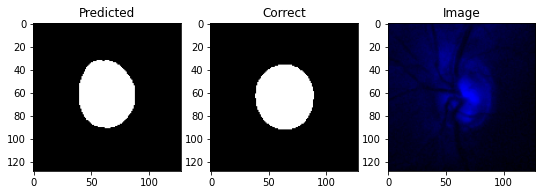

IOU: 0.8869420289993286
Dice: 0.9400840150342693
image #29


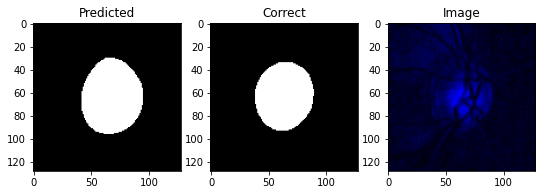

IOU: 0.7860139608383179
Dice: 0.880187940485513
image #30


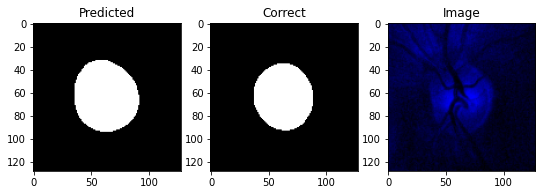

IOU: 0.8506374955177307
Dice: 0.9192913385826772
image #31


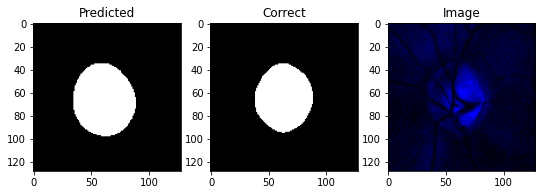

IOU: 0.8085651397705078
Dice: 0.8941509815826756
image #32


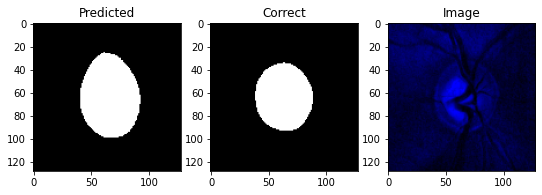

IOU: 0.7535941004753113
Dice: 0.859485224022879
image #33


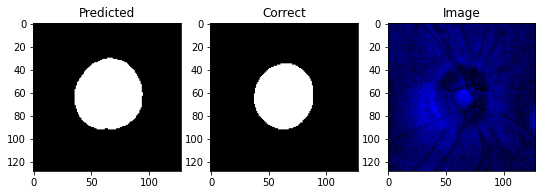

IOU: 0.7957476377487183
Dice: 0.8862577639751553
image #34


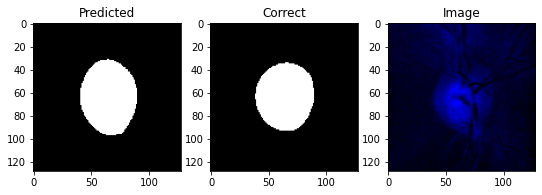

IOU: 0.8998826742172241
Dice: 0.9473034170440511
image #35


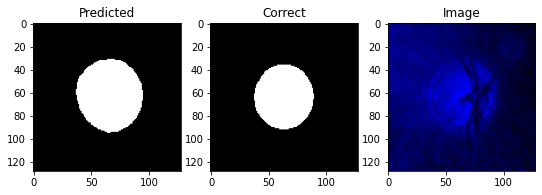

IOU: 0.7879213690757751
Dice: 0.8813825608798115
image #36


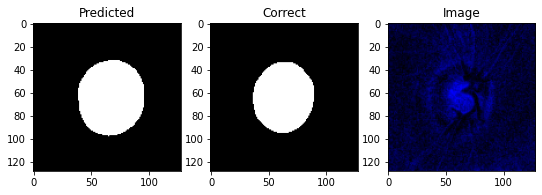

IOU: 0.8123570084571838
Dice: 0.8964646464646465
image #37


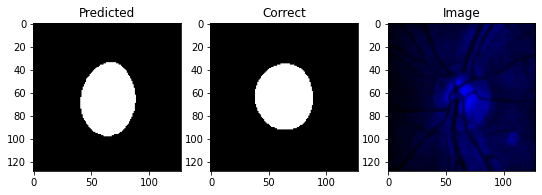

IOU: 0.8703030347824097
Dice: 0.9306545690213869
image #38


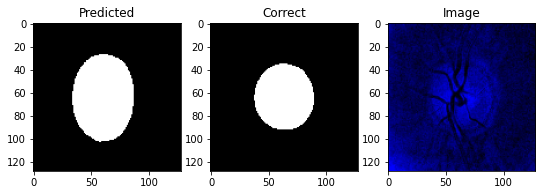

IOU: 0.6942830681800842
Dice: 0.8195597257307831
image #39


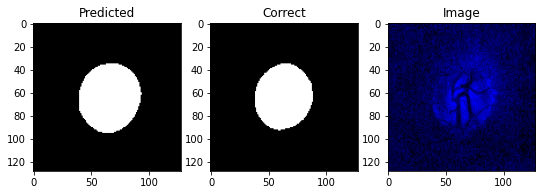

IOU: 0.8573655486106873
Dice: 0.9232060428031893
image #40


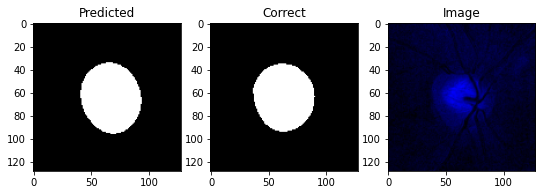

IOU: 0.8312894701957703
Dice: 0.9078733766233766
image #41


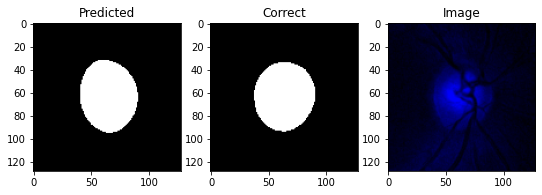

IOU: 0.9019683599472046
Dice: 0.9484577922077922
image #42


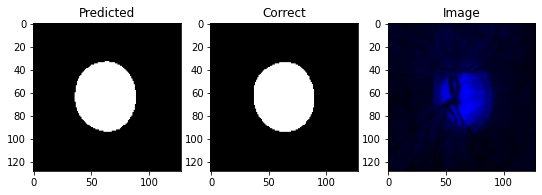

IOU: 0.9333333373069763
Dice: 0.9655172413793104
image #43


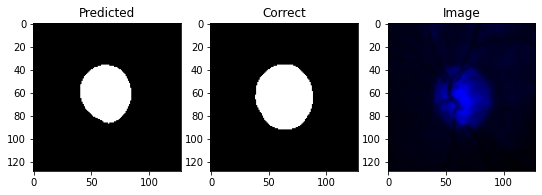

IOU: 0.7726860046386719
Dice: 0.8717686204248785
image #44


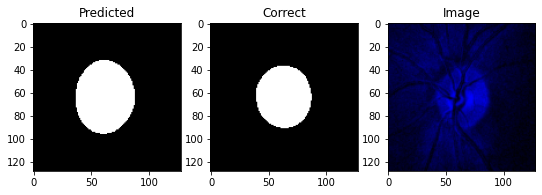

IOU: 0.797656238079071
Dice: 0.8874402433724468
image #45


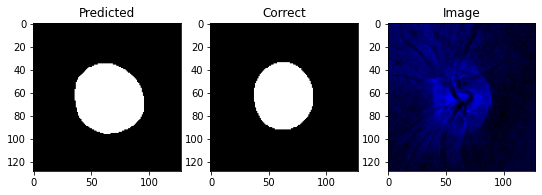

IOU: 0.8093599677085876
Dice: 0.894636744009129
image #46


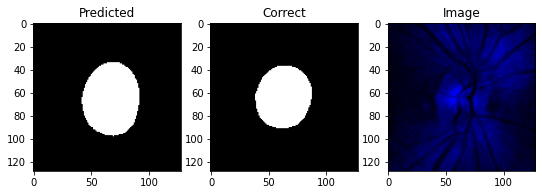

IOU: 0.7536287307739258
Dice: 0.8595077325201481
image #47


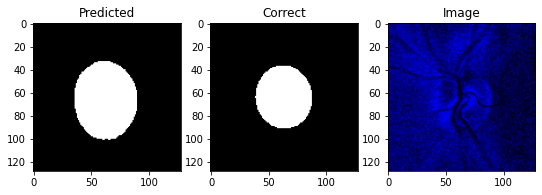

IOU: 0.7178082466125488
Dice: 0.835725677830941
image #48


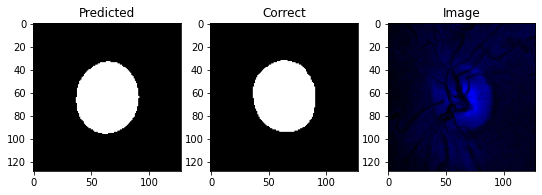

IOU: 0.9306211471557617
Dice: 0.9640639698965193
image #49


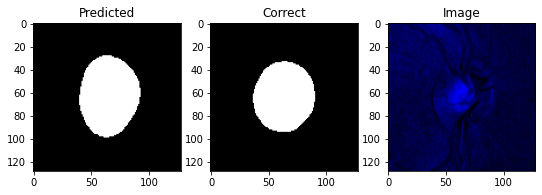

IOU: 0.8399592041969299
Dice: 0.9130193905817174
image #50


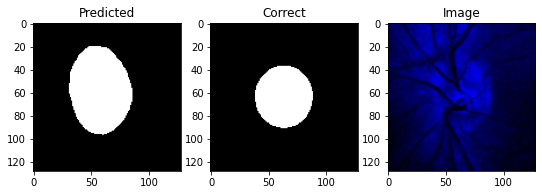

IOU: 0.6072617173194885
Dice: 0.7556475903614458


In [13]:
pred_iou, pred_dice, pred_disc = predict(blue_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.812436
0.8944573673104411


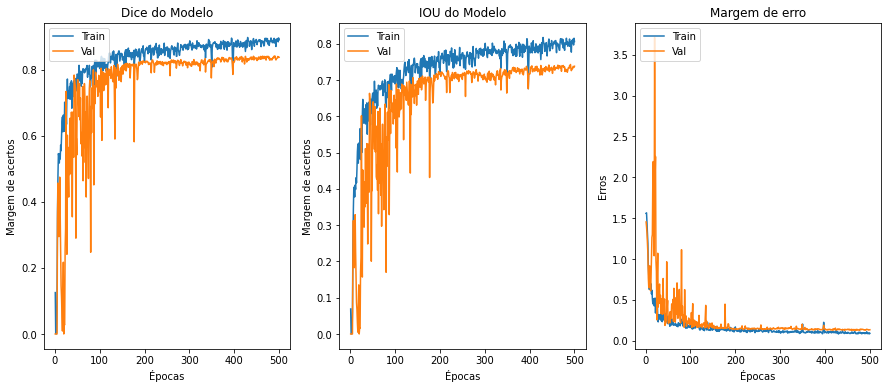

In [18]:
plot_results(history_cup, epochs)

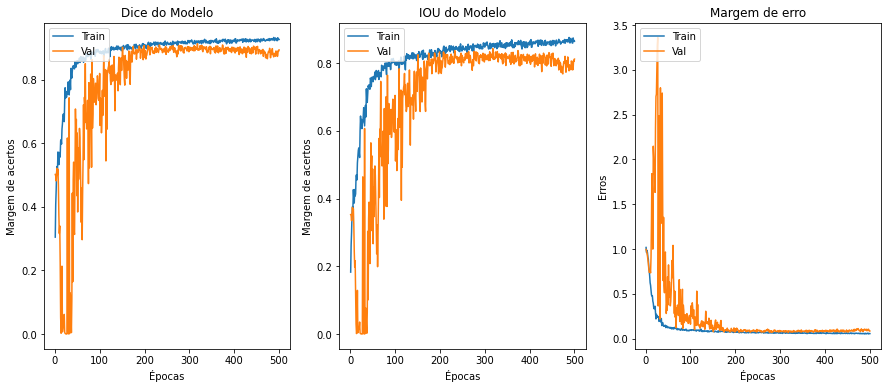

In [19]:
plot_results(history_disc, epochs)

In [20]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)


image #0 - cdr = 0.7623997623479649
image #1 - cdr = 0.7913697257876778
image #2 - cdr = 0.7863662068164726
image #3 - cdr = 0.6115744632386525
image #4 - cdr = 0.7315811627046506
image #5 - cdr = 0.6977486379192471
image #6 - cdr = 0.7949832613495236
image #7 - cdr = 0.6970317406391072
image #8 - cdr = 0.7650400512714681
image #9 - cdr = 0.7738434972875556
image #10 - cdr = 0.7797349058759958
image #11 - cdr = 0.9312715726926539
image #12 - cdr = 0.7591058263908108
image #13 - cdr = 0.7957682998069547
image #14 - cdr = 0.6991171315879394
image #15 - cdr = 0.7265959131484379
image #16 - cdr = 0.6350500615053014
image #17 - cdr = 0.6365308006564191
image #18 - cdr = 0.6797408528136679
image #19 - cdr = 0.7605452396666101
image #20 - cdr = 0.686284665904251
image #21 - cdr = 0.7384674772838443
image #22 - cdr = 0.6177249940319886
image #23 - cdr = 0.7346314931821197
image #24 - cdr = 0.7737788897779583
image #25 - cdr = 0.6400728406021006
image #26 - cdr = 0.7675203873975354
image #27 - 

In [21]:
pd.DataFrame(data= result)

cdr      area
0   0.762400  0.550639
1   0.791370  0.603780
2   0.786366  0.710111
3   0.611574  0.391397
4   0.731581  0.555048
5   0.697749  0.506324
6   0.794983  0.580854
7   0.697032  0.498441
8   0.765040  0.575543
9   0.773843  0.644659
10  0.779735  0.583965
11  0.931272  0.759899
12  0.759106  0.529866
13  0.795768  0.645924
14  0.699117  0.473273
15  0.726596  0.521757
16  0.635050  0.413079
17  0.636531  0.371075
18  0.679741  0.451682
19  0.760545  0.524911
20  0.686285  0.405472
21  0.738467  0.499595
22  0.617725  0.376020
23  0.734631  0.545703
24  0.773779  0.565891
25  0.640073  0.405667
26  0.767520  0.565934
27  0.564736  0.364260
28  0.736016  0.511229
29  0.654643  0.485766
30  0.666498  0.468852
31  0.771303  0.571268
32  0.633781  0.447199
33  0.624723  0.358688
34  0.665624  0.491607
35  0.812826  0.582716
36  0.665434  0.453422
37  0.685156  0.475806
38  0.684219  0.474867
39  0.820687  0.657583
40  0.648462  0.468613
41  0.693027  0.550429
42  0.785876  0.627567
43  0.814691  0.617146
44  0.739280  0.529297
45  0.710696  0.495321
46  0.551165  0.322000
47  0.593376  0.314726
48  0.715829  0.520951
49  0.563687  0.370266
50  0.587548  0.300188

In [22]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   41.071129  50.027889  56.433426  65.618973
1   42.092266  51.435482  55.298756  64.995514
2   46.395081  50.945374  51.369923  64.785812
3   35.834583  39.821144  55.218037  65.112503
4   37.080051  41.989319  48.955120  57.395298
5   37.547504  42.545589  51.521454  60.975525
6   38.701572  50.392845  52.920731  63.388561
7   35.463871  40.369381  49.693859  57.916130
8   38.137093  46.369694  50.459019  60.610806
9   42.590118  52.281296  51.023361  67.560555
10  42.070107  49.128365  56.158245  63.006496
11  35.149097  44.192013  43.001873  47.453411
12  40.631737  47.826965  57.887146  63.004345
13  36.589828  47.152641  44.872059  59.254234
14  33.011391  44.503426  48.991127  63.656609
15  35.153324  47.152683  48.933575  64.895332
16  37.785511  42.727272  57.787643  67.281738
17  36.611691  42.986721  62.722519  67.532822
18  38.371223  42.060078  57.753868  61.876637
19  36.991528  51.547394  53.021557  67.776894
20  33.384663  44.726139  55.972893  65.171410
21  36.180717  43.924023  53.092201  59.479969
22  31.875174  37.115341  52.199215  60.083923
23  42.370480  48.414330  56.862701  65.902878
24  37.930656  44.488331  51.679787  57.494888
25  31.908920  45.769466  50.660915  71.506653
26  38.640522  44.532745  52.107708  58.021580
27  30.817610  37.601654  47.709217  66.582687
28  34.171516  43.753757  48.923061  59.446781
29  39.473087  43.258114  53.239128  66.078972
30  39.402218  42.001171  55.870594  63.017708
31  39.839607  48.966961  53.851257  63.486034
32  36.459721  46.388668  51.594154  73.193497
33  33.752411  39.088333  58.654861  62.569092
34  36.205036  43.532692  48.960728  65.401306
35  41.268238  51.580700  57.183552  63.458454
36  39.554668  43.964485  57.896858  66.068886
37  32.868973  43.745934  47.285488  63.848175
38  37.289364  52.260696  53.580875  76.380119
39  42.615501  49.898121  53.336388  60.800449
40  37.472954  40.118500  51.754387  61.867203
41  39.515278  43.674389  49.821026  63.019783
42  42.525551  47.816628  53.182709  60.844990
43  33.248039  40.789165  43.776897  50.067009
44  36.895287  47.192608  51.370678  63.835880
45  40.858082  44.957973  58.410416  63.259083
46  29.530468  35.392570  49.775539  64.214119
47  29.515841  40.498867  54.767803  68.251595
48  39.404217  44.730312  54.219097  62.487465
49  34.068623  39.713837  52.046631  70.453651
50  28.234745  45.083344  53.562458  76.731346